In [137]:
# Import Libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import mpu

%matplotlib inline

In [20]:
#rad CSV File

Year_2019_Q4 = pd.read_csv("D:\\GA Work_Essia\\Data\\metro-bike-share-trips-2019-q4.csv")
Year_2019_Q4.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,130053086,25,2019-10-01 00:03:10,2019-10-01 00:28:40,3049,34.056969,-118.253593,3038,34.046822,-118.248352,16580,365,One Way,Annual Pass,electric
1,130053085,2,2019-10-01 00:07:43,2019-10-01 00:09:44,3067,34.045181,-118.250237,3029,34.048851,-118.246422,19587,30,One Way,Monthly Pass,electric
2,130053084,15,2019-10-01 00:17:30,2019-10-01 00:32:01,4420,34.168629,-118.377068,4416,34.157581,-118.388260,15625,30,One Way,Monthly Pass,smart
3,130053083,4,2019-10-01 00:18:20,2019-10-01 00:22:34,3031,34.044701,-118.252441,3006,34.045540,-118.256668,12450,365,One Way,Annual Pass,standard
4,130053082,20,2019-10-01 00:22:09,2019-10-01 00:42:53,3042,34.049301,-118.238808,4314,34.057709,-118.279762,17519,365,One Way,Annual Pass,electric


In [21]:
#Change datatype
    
Year_2019_Q4["start_time"]=pd.to_datetime(Year_2019_Q4['start_time'])
Year_2019_Q4["end_time"]=pd.to_datetime(Year_2019_Q4['end_time'])

In [23]:
#check datatype

Year_2019_Q4.dtypes

trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station                   int64
start_lat                     float64
start_lon                     float64
end_station                     int64
end_lat                       float64
end_lon                       float64
bike_id                         int64
plan_duration                   int64
trip_route_category            object
passholder_type                object
bike_type                      object
dtype: object

In [24]:
#extract hour from time

Year_2019_Q4["start_hour"]=Year_2019_Q4["start_time"].dt.hour
Year_2019_Q4["end_hour"]=Year_2019_Q4["end_time"].dt.hour

In [26]:
# Select specific columns from dataset

Year_2019_Q4=Year_2019_Q4[['start_station','start_hour','end_station','end_hour','duration','bike_id','passholder_type','plan_duration','trip_route_category','bike_type']]
Year_2019_Q4.head()

,start_station,start_hour,end_station,end_hour,duration,bike_id,passholder_type,plan_duration,trip_route_category,bike_type
0,3049,0,3038,0,25,16580,Annual Pass,365,One Way,electric
1,3067,0,3029,0,2,19587,Monthly Pass,30,One Way,electric
2,4420,0,4416,0,15,15625,Monthly Pass,30,One Way,smart
3,3031,0,3006,0,4,12450,Annual Pass,365,One Way,standard
4,3042,0,4314,0,20,17519,Annual Pass,365,One Way,electric


In [37]:
# Sort dataframe using start Station

Year_2019_Q4.sort_values('start_station')

,start_station,start_hour,end_station,end_hour,duration,bike_id,passholder_type,plan_duration,trip_route_category,bike_type
39382,3000,23,4463,23,5,15715,Monthly Pass,30,One Way,smart
16715,3000,13,4353,13,1,16060,Walk-up,1,One Way,smart
67868,3000,19,4417,19,14,15650,Walk-up,1,One Way,smart
66165,3000,22,4414,22,5,15352,Monthly Pass,30,One Way,smart
63066,3000,18,4427,18,7,16057,Monthly Pass,30,One Way,smart
27626,3000,12,3000,12,1,15946,Testing,999,One Way,smart
58944,3000,12,4285,12,6,16245,Walk-up,365,One Way,smart
63053,3000,18,4419,18,11,15185,Monthly Pass,30,One Way,smart
34214,3000,17,4413,17,8,15330,Monthly Pass,30,One Way,smart
12384,3000,14,4419,14,18,15673,Monthly Pass,30,One Way,smart


In [46]:
#Average duration by station

Year_2019_Q4.groupby('start_station').duration.mean()

start_station
3000    25.581081
3005    23.977644
3006    17.787933
3007    15.406447
3008    27.198234
3010    17.783186
3011    19.169197
3014    16.772105
3016    12.759459
3018    16.450746
3019    18.786170
3020    24.339535
3022    22.513983
3023    39.146718
3024    13.338673
3025    39.555556
3026    16.387449
3027    13.835273
3028    29.662162
3029    14.880249
3030    12.425997
3031    18.512883
3032    18.554295
3033    16.104828
3034    16.085290
3035    24.708432
3036    32.515759
3037    45.239796
3038    18.224192
3040    20.368852
          ...    
4445    50.746888
4446    23.520468
4447    31.632653
4448    23.010638
4449    45.563380
4450    50.651515
4451    61.043478
4452    20.916667
4453    28.220779
4454    62.031915
4455    23.558140
4456    51.247706
4457    43.096774
4458    35.500000
4459    14.108696
4460    41.666667
4461    21.931034
4462     8.515152
4463    11.571429
4469    34.647059
4470    77.809524
4472    16.290909
4473    19.068966
4480    26.784

In [50]:
# sort values using start_station,start_hour

Year_2019_Q4.sort_values(['start_station','start_hour'])

,start_station,start_hour,end_station,end_hour,duration,bike_id,passholder_type,plan_duration,trip_route_category,bike_type,Average_Duration
1980,3000,6,4285,6,1,16009,Annual Pass,365,One Way,smart,NaN
2068,3000,7,4420,7,1,16029,Annual Pass,365,One Way,smart,NaN
2070,3000,7,4420,7,1,15891,Annual Pass,365,One Way,smart,NaN
131,3000,8,4349,8,5,16259,Monthly Pass,30,One Way,smart,NaN
70909,3000,8,4420,9,6,15383,Monthly Pass,30,One Way,smart,NaN
4068,3000,9,4349,10,41,15972,One Day Pass,1,One Way,smart,NaN
21068,3000,9,4422,9,26,15253,Walk-up,1,One Way,smart,NaN
39615,3000,9,4286,9,1,15177,Annual Pass,365,One Way,smart,NaN
75566,3000,9,4409,14,311,15691,One Day Pass,1,One Way,smart,NaN
39665,3000,10,3000,10,1,16135,Annual Pass,365,One Way,smart,NaN


In [55]:
#find bike count
Year_2019_Q4["bike_count"] = Year_2019_Q4["bike_id"].count()

In [67]:
#pivot table for bike count left from station and hour

s=pd.pivot_table(Year_2019_Q4,index=["start_station","start_hour"],columns=["bike_type"],values=["bike_count"],aggfunc="count",margins=True)
print(s)
s.to_csv('D:\\GA Work_Essia\\Data\\Bikeleft.csv')

                         bike_count                         
bike_type                  electric    smart standard    All
start_station start_hour                                    
3000          6                 NaN      1.0      NaN      1
              7                 NaN      2.0      NaN      2
              8                 NaN      2.0      NaN      2
              9                 NaN      4.0      NaN      4
              10                NaN      3.0      NaN      3
              11                NaN      6.0      NaN      6
              12                2.0      4.0      NaN      6
              13                NaN      5.0      NaN      5
              14                NaN      2.0      NaN      2
              15                2.0      4.0      NaN      6
              16                4.0      4.0      NaN      8
              17                1.0     10.0      NaN     11
              18                NaN      6.0      NaN      6
              19        

In [71]:
#pivot table for bike count come to the station and hour
s1=pd.pivot_table(Year_2019_Q4,index=["end_station","end_hour"],columns=["bike_type"],values=["bike_count"],aggfunc="count",margins=True)
print(s1)
s1.to_csv('D:\\GA Work_Essia\\Data\\Bikescome.csv')

                     bike_count                         
bike_type              electric    smart standard    All
end_station end_hour                                    
3000        0               2.0      NaN      4.0      6
            1               4.0      NaN      4.0      8
            2               NaN      1.0      NaN      1
            3               2.0      NaN      NaN      2
            4               1.0      NaN      NaN      1
            5               4.0      NaN      3.0      7
            6              10.0      1.0     13.0     24
            7              44.0      2.0     38.0     84
            8              43.0     13.0     67.0    123
            9              45.0      8.0     47.0    100
            10             30.0      9.0     41.0     80
            11             33.0      4.0     33.0     70
            12             41.0     15.0     25.0     81
            13             31.0     11.0     48.0     90
            14             27.0

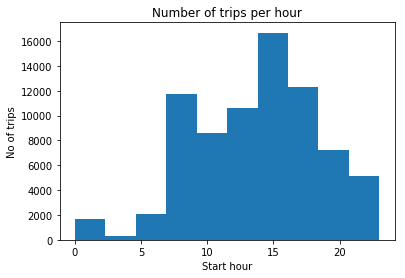

In [88]:
# Histogram for number of trips

fig, ax = plt.subplots()
ax.hist(Year_2019_Q4['start_hour'],range=(0,23))
ax.set_title('Number of trips per hour')
plt.xlabel('Start hour')
plt.ylabel('No of trips')
plt.show()

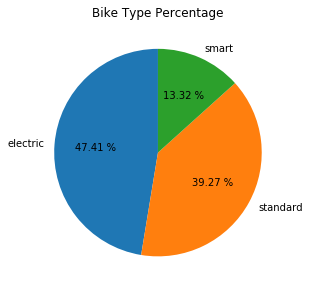

In [131]:
#Bike type pie chart

bike_type=Year_2019_Q4['bike_type'].value_counts()
plt.pie(bike_type,labels=bike_type.index,startangle=90,autopct='%0.2f %%')

plt.tight_layout()
plt.title("Bike Type Percentage")

plt.show()

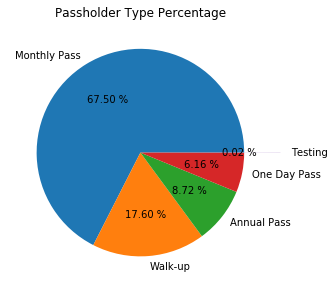

In [133]:
#Passholder Type pie chart

passholder_type=Year_2019_Q4['passholder_type'].value_counts()
plt.pie(passholder_type,labels=passholder_type.index,explode=(0, 0,0, 0, 0.35),autopct='%0.2f %%')
plt.tight_layout()
plt.title("Passholder Type Percentage")
plt.show()

In [139]:
Year_2019_Q4['passholder_type'].value_counts()

Monthly Pass    51513
Walk-up         13430
Annual Pass      6655
One Day Pass     4698
Testing            19
Name: passholder_type, dtype: int64

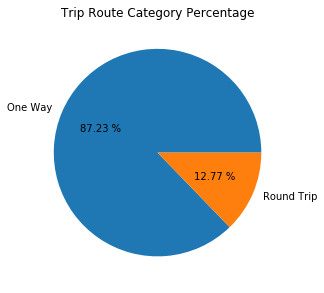

In [134]:
#Trip Route Category pie chart

trip_route_category=Year_2019_Q4['trip_route_category'].value_counts()
plt.pie(trip_route_category,labels=trip_route_category.index,autopct='%0.2f %%')
plt.tight_layout()
plt.title("Trip Route Category Percentage")
plt.show()

In [ ]:
dist = mpu.haversine_distance((lat1, lon1), (lat2, lon2))
print(dist)